# Data Processing and Cleaning

I have already downloaded slightly over 10000 fanfiction works from https://archiveofourown.org/media using a separate python script (this script is included separately in the upload and is linked to in my markdown file), and I will process that data here using the python library BeautifulSoup. Data collection with scrapy takes time, and it took me over a week to process my full dataset, but it's all here.

In [1]:
from bs4 import BeautifulSoup
import os
import glob
import lxml

file_location = os.path.join('C:/Users/rsbru/OneDrive/Documents/data_science/Fanfiction-Classification-Analysis/data/', '*.html')
filenames = glob.glob(file_location)
files = {}
for f in filenames:
    with open(f, encoding = 'utf8') as fp:
        soup = BeautifulSoup(fp, 'lxml')
        file_name = f[87:]
        files[file_name] = soup

Now that I have my files read into python as searchable html files, I can use BeautifulSoup's search operations to pull out the parts of the document that are relevant to my project (namely the text itself and the tags attached to the work).

In [3]:
import pandas as pd
file_names = [f[87:] for f in filenames]
ratings = {}
rat_dict = {}
warnings = {}
warn_dict = {}
warns_list = []
categories = {}
cat_dict = {}
cats_list = []
fandoms = {}
fan_dict = {}
fans_list = []
relationships = {}
rel_dict = {}
rels_list = []
characters = {}
char_dict = {}
chars_list = []
additional = {}
extra_dict = {}
extra_list = []
texts = {}
for fn in file_names:
    if(files[fn].find('dd', class_="rating tags") is not None):
        rats = []
        for child in files[fn].find('dd', class_="rating tags").find_all('a'):
            for string in child.stripped_strings:
                rats.append(string)
        ratings[fn] = ', '.join(rats)
        rat_dict[fn] = rats
    if(files[fn].find('dd', class_="warning tags") is not None):
        warns = []
        for child in files[fn].find('dd', class_="warning tags").find_all('a'):
            for string in child.stripped_strings:
                warns.append(string)
        warnings[fn] = ', '.join(warns)
        warn_dict[fn] = warns
        for item in warn_dict[fn]:
            warns_list.append(item)
    if(files[fn].find('dd', class_="category tags") is not None):
        cats = []
        for child in files[fn].find('dd', class_="category tags").find_all('a'):
            for string in child.stripped_strings:
                cats.append(string)
        categories[fn] = ', '.join(cats)
        cat_dict[fn] = cats
        for item in cat_dict[fn]:
            cats_list.append(item)
    if(files[fn].find('dd', class_="fandom tags") is not None):
        fans = []
        for child in files[fn].find('dd', class_="fandom tags").find_all('a'):
            for string in child.stripped_strings:
                fans.append(string)
        fandoms[fn] = ', '.join(fans)
        fan_dict[fn] = fans
        for item in fan_dict[fn]:
            fans_list.append(item)
    if(files[fn].find('dd', class_="relationship tags") is not None):
        rels = []
        for child in files[fn].find('dd', class_="relationship tags").find_all('a'):
            for string in child.stripped_strings:
                rels.append(string)
        relationships[fn] = ', '.join(rels)
        rel_dict[fn] = rels
        for item in rel_dict[fn]:
            rels_list.append(item)
    if(files[fn].find('dd', class_="character tags") is not None):
        chars = []
        for child in files[fn].find('dd', class_="character tags").find_all('a'):
            for string in child.stripped_strings:
                chars.append(string)
        characters[fn] = ', '.join(chars)
        char_dict[fn] = chars
        for item in char_dict[fn]:
            chars_list.append(item)
    if(files[fn].find('dd', class_="freeform tags") is not None):
        adds = []
        for child in files[fn].find('dd', class_="freeform tags").find_all('a'):
            for string in child.stripped_strings:
                adds.append(string)
        additional[fn] = ', '.join(adds)
        extra_dict[fn] = adds
        for item in extra_dict[fn]:
            extra_list.append(item)
    tex = files[fn].find_all('p')
    pars = []
    for text in tex:
        for string in text.stripped_strings:
            pars.append(string)
    texts[fn] = '\n'.join(pars)

I will now organize the data I've pulled out of my raw files into a DataFrame using pandas.

In [4]:
fanfics = pd.DataFrame({'Filename': file_names})
fanfics['Rating'] = fanfics['Filename'].map(ratings)
fanfics['Warning'] = fanfics['Filename'].map(warnings)
fanfics['Category'] = fanfics['Filename'].map(categories)
fanfics['Fandom'] = fanfics['Filename'].map(fandoms)
fanfics['Relationships'] = fanfics['Filename'].map(relationships)
fanfics['Characters'] = fanfics['Filename'].map(characters)
fanfics['Additional'] = fanfics['Filename'].map(additional)
fanfics['Text'] = fanfics['Filename'].map(texts)

In [5]:
fanfics.head()

,Filename,Rating,Warning,Category,Fandom,Relationships,Characters,Additional,Text
0,1005380.html,Explicit,Creator Chose Not To Use Archive Warnings,M/M,Harry Potter - J. K. Rowling,"Sirius Black/Remus Lupin, James/Lily, Peter Pe...","Remus Lupin, Sirius Black, James Potter, Lily ...","Humor, Angst, First War with Voldemort",While we've done our best to make the core fun...
1,10057010.html,Mature,"No Archive Warnings Apply, Major Character Dea...",M/M,Harry Potter - J. K. Rowling,"Sirius Black/Remus Lupin, Sirius Black & Remus...","Remus Lupin, Sirius Black, James Potter, Lily ...","Marauders' Era, Marauders, Marauders Friendshi...",While we've done our best to make the core fun...
2,10074443.html,Explicit,No Archive Warnings Apply,M/M,"Batman (Movies - Nolan), Dark Knight Rises - F...",Bane (DCU)/John Blake,"Bane (DCU), John Blake","nightwing!blake, dub-con, Fanart, molesting ag...",While we've done our best to make the core fun...
3,1008747.html,Explicit,Underage,M/M,Harry Potter - J. K. Rowling,"Harry Potter/Voldemort, Harry Potter/Tom Riddl...","Harry Potter, Voldemort, Tom Riddle | Voldemor...","Angst, First Time, Work In Progress, Alternate...",While we've done our best to make the core fun...
4,10159223.html,Explicit,Rape/Non-Con,"F/M, Multi, F/F",Spider-Man (Comicverse),"Peter Parker/Calypso, Betty Brant/Peter Parker...","Peter Parker, Calypso, Betty Brant, Felicia Ha...","Adultery, Femdom, Seduction, Office Sex, Three...",While we've done our best to make the core fun...


Just for fun here (and to make sure my DataFrame is functional), let's look at the most common fandoms in my (limited) dataset.

In [6]:
%pprint
fanfics.Fandom.value_counts()

Pretty printing has been turned OFF


Harry Potter - J. K. Rowling                                                                                                                                                                                                                                                                                        617
僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia                                                                                                                                                                                                                                                              459
原神 | Genshin Impact (Video Game)                                                                                                                                                                                                                                                                                    197
Naruto                                                          

I did all of the above work for my first progress report. Everything below this is my finalized data cleaning and organization for my second progress report. First, I'm going to look at the value counts for every label.

In [7]:
fanfics.Rating.value_counts()

Explicit                 3234
Teen And Up Audiences    2327
Mature                   2313
Not Rated                1051
General Audiences         837
Name: Rating, dtype: int64

In [8]:
fanfics.Warning.value_counts()

Creator Chose Not To Use Archive Warnings                                                      3187
No Archive Warnings Apply                                                                      3065
Graphic Depictions Of Violence                                                                 1127
Graphic Depictions Of Violence, Major Character Death                                           394
Underage                                                                                        222
                                                                                               ... 
Rape/Non-Con, Underage, Graphic Depictions Of Violence, Major Character Death                     1
No Archive Warnings Apply, Rape/Non-Con, Underage                                                 1
Underage, Creator Chose Not To Use Archive Warnings, Rape/Non-Con                                 1
Creator Chose Not To Use Archive Warnings, Major Character Death, No Archive Warnings Apply       1


In [9]:
fanfics.Category.value_counts()

M/M                                 2532
F/M                                 1840
Gen                                  862
F/F                                  628
Multi                                345
                                    ... 
F/F, F/M, M/M, Gen, Multi, Other       1
Other, F/F, F/M                        1
F/F, F/M, Multi, Other, M/M            1
Multi, F/F, M/M, Other, F/M            1
Gen, F/M, F/F                          1
Name: Category, Length: 178, dtype: int64

In [10]:
fanfics.Relationships.value_counts()

Hermione Granger/Draco Malfoy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               33
Fezco/Lexi Howard                                                                                        

In [11]:
fanfics.Characters.value_counts()

Caitlyn (League of Legends), Vi (League of Legends)                                                                                                     8
Tartaglia | Childe (Genshin Impact), Zhongli (Genshin Impact)                                                                                           8
Original Characters                                                                                                                                     7
Lán Zhàn | Lán Wàngjī, Wèi Yīng | Wèi Wúxiàn                                                                                                            6
Clay | Dream (Video Blogging RPF), GeorgeNotFound (Video Blogging RPF), Sapnap (Video Blogging RPF)                                                     6
                                                                                                                                                       ..
Cheryl Blossom, Betty Cooper, Southside Serpents Gang, Malachai "Kai" Parker

In [12]:
fanfics.Additional.value_counts()

Alternate Universe - Canon Divergence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            9
Smut                                                                                                                                 

What I'm seeing here is that my choice to join tags using commas was a good choice to get them all into a readable DataFrame, but not to see what fics share tags. I don't think I can assign multiple tags to each fic within the DataFrame without making it really ugly and inefficient, so while I will use my DataFrame as a pretty thing that I can print to csv, I will work with regular dictionaries from here on out.

In [13]:
import nltk
warn_freq = nltk.FreqDist(warns_list)
warn_freq.most_common(20)

[('Creator Chose Not To Use Archive Warnings', 3734), ('No Archive Warnings Apply', 3422), ('Graphic Depictions Of Violence', 2431), ('Rape/Non-Con', 946), ('Major Character Death', 866), ('Underage', 714)]

In [14]:
cat_freq = nltk.FreqDist(cats_list)
cat_freq.most_common(20)

[('M/M', 4388), ('F/M', 3888), ('F/F', 1856), ('Multi', 1677), ('Gen', 1659), ('Other', 600)]

In [15]:
fan_freq = nltk.FreqDist(fans_list)
fan_freq.most_common(20)

[('Harry Potter - J. K. Rowling', 753), ('僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia', 575), ('Marvel Cinematic Universe', 304), ('Minecraft (Video Game)', 300), ('Naruto', 241), ('Video Blogging RPF', 232), ('原神 | Genshin Impact (Video Game)', 205), ('Star Wars - All Media Types', 203), ('Encanto (2021)', 194), ('The Avengers (Marvel Movies)', 181), ('방탄소년단 | Bangtan Boys | BTS', 167), ("Five Nights at Freddy's", 167), ('Batman - All Media Types', 165), ('Shingeki no Kyojin | Attack on Titan', 132), ('鬼滅の刃 | Demon Slayer: Kimetsu no Yaiba (Anime)', 130), ('Biohazard | Resident Evil (Gameverse)', 129), ('Game of Thrones (TV)', 126), ('A Song of Ice and Fire - George R. R. Martin', 118), ('Miraculous Ladybug', 116), ('Haikyuu!!', 115)]

In [16]:
rel_freq = nltk.FreqDist(rels_list)
rel_freq.most_common(20)

[('Minor or Background Relationship(s)', 150), ('Sirius Black/Remus Lupin', 119), ('Other Relationship Tags to Be Added', 108), ('Aizawa Shouta | Eraserhead/Yamada Hizashi | Present Mic', 100), ('Draco Malfoy/Harry Potter', 95), ('Wilbur Soot & Technoblade & TommyInnit & Phil Watson', 93), ('Aizawa Shouta | Eraserhead & Midoriya Izuku', 89), ('Bakugou Katsuki/Midoriya Izuku', 87), ('Félix Madrigal/Pepa Madrigal', 82), ('Hermione Granger/Draco Malfoy', 75), ('Midoriya Izuku/Todoroki Shouto', 70), ('Lán Zhàn | Lán Wàngjī/Wèi Yīng | Wèi Wúxiàn', 70), ('Wilbur Soot & TommyInnit', 70), ('James Potter/Lily Evans Potter', 69), ('Peter Parker & Tony Stark', 69), ('Bakugou Katsuki & Midoriya Izuku', 66), ('Agustín Madrigal/Julieta Madrigal', 66), ('Technoblade & TommyInnit (Video Blogging RPF)', 63), ('Fezco/Lexi Howard', 63), ('Harry Potter/Ginny Weasley', 59)]

In [17]:
char_freq = nltk.FreqDist(chars_list)
char_freq.most_common(20)

[('Original Characters', 615), ('Harry Potter', 536), ('Original Female Character(s)', 449), ('Reader', 423), ('Midoriya Izuku', 422), ('Hermione Granger', 365), ('Bakugou Katsuki', 324), ('Original Male Character(s)', 295), ('Draco Malfoy', 294), ('Aizawa Shouta | Eraserhead', 287), ('Ron Weasley', 285), ('Sirius Black', 260), ('Severus Snape', 249), ('Remus Lupin', 237), ('Tony Stark', 227), ('TommyInnit (Video Blogging RPF)', 227), ('Wilbur Soot', 227), ('Todoroki Shouto', 221), ('Technoblade (Video Blogging RPF)', 221), ('Clay | Dream (Video Blogging RPF)', 210)]

In [18]:
extra_freq = nltk.FreqDist(extra_list)
extra_freq.most_common(20)

[('Angst', 1700), ('Fluff', 1445), ('Hurt/Comfort', 1349), ('Slow Burn', 1142), ('Alternate Universe - Canon Divergence', 1139), ('Other Additional Tags to Be Added', 934), ('Smut', 929), ('Fluff and Angst', 836), ('Anal Sex', 770), ('Oral Sex', 675), ('Romance', 613), ('Angst with a Happy Ending', 603), ('Eventual Smut', 563), ('Canon-Typical Violence', 538), ('Alpha/Beta/Omega Dynamics', 514), ('Alternate Universe', 498), ('Rough Sex', 484), ('Emotional Hurt/Comfort', 471), ('Explicit Sexual Content', 465), ('Fluff and Smut', 460)]

I will continue to update this script as I move on to analysis with the (many) data structures I now have at my disposal. For now, I have a much better idea of the shape of my data, and I'm much more comfortable moving forward to analysis and classification.

# Analysis

Getting into this analysis, this is going to be more complicated than the analysis I've done before on other datasets because if I've learned anything from delving into my data, it's that these fanfictions are not easily slotted into one category. Because of that, I don't feel that basic classification models like Naive Bayes will serve me well. Instead, I'm going to move straight to SVC classification with my texts and try KNN classification with non-lexical features, and then maybe work with some unsupervised machine learning (we'll see if I get to it).

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf_model = Pipeline([('tfidf', TfidfVectorizer(max_features=10000, min_df=2, ngram_range=(1,2), 
                                                  tokenizer=nltk.word_tokenize)), 
                        ('pca', TruncatedSVD(n_components=1000)),   
                        ('svc', SVC(probability=True))])

First, as a test, I'm going to see how well my model does at predicting ratings based solely on text, as I think that'll be the easiest and give me the best idea of what I'm dealing with here without further complications.

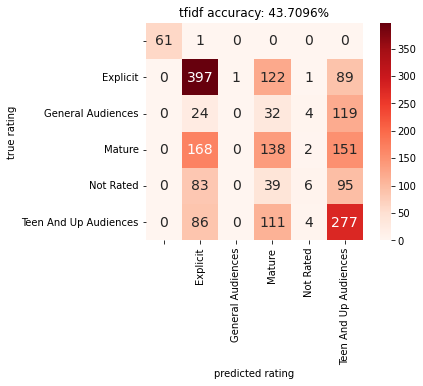

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fanfics = fanfics.fillna(value = '')
X_text = fanfics['Text']
y1 = fanfics['Rating'].replace(to_replace = 'NaN', value = 'Not Rated')

X_train, X_test, y_train, y_test = train_test_split(X_text, y1, test_size = 0.2, random_state = 0)

tfidf_model.fit(X_train, y_train)
y_pred = tfidf_model.predict(X_test)

def plot_cm(y_test, y_pred, model_name, ticks):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 14},
                xticklabels=ticks, yticklabels=ticks)
    plt.xlabel('predicted rating')
    plt.ylabel('true rating')
    plt.title(f'{model_name} accuracy: {accuracy_score(y_test, y_pred)*100:0.4f}%')
    plt.show()
    
plot_cm(y_test, y_pred, 'tfidf', np.unique(y_test))

This took a good fifteen minutes to run and was not as accurate as I expected! This model is very in-depth, but it seemed to overestimate the number of explicit, mature, and teen and up audience ratings. It seems like the uneven representation of ratings in the sample really skewed the classifier. Next I'm going to try running a fandoms classifier with the categorical data from other columns (i.e. other tags) included. Since there are a lot of fandoms represented, I won't do a heat map, just check on accuracy and other measurements.

In [21]:
len(set(fans_list))

2425

In [26]:
fan_set = set(fans_list)
warns_set = set(warns_list)
cats_set = set(cats_list)
rels_set = set(rels_list)
chars_set = set(chars_list)
extra_set = set(extra_list)

I've deleted some unsuccessful attempts at dummifying my categorical data, so that's something I still need to figure out if I want to work with it. I'm going to work more on figuring out effective ways to deal with uneven representation of various tags (I think I'm going to work with sample weights), but I also think I'm going to try to work with some unsupervised machine learning in the week or so leading up to my presentation. I don't know how well I'll be able to do that on just Jupyter Notebook (my computer is already protesting at the amount of work I'm making it do) so I might have to use CRC. I would appreciate any feedback or suggestions! It's possible that this dataset just isn't very well-suited to traditional classification, but even if that's the case, I'd like to explore clustering. For now, I'm going to pickle my DataFrame using pandas so that I can work with it in other locations. This .pkl file will NOT be uploaded to my remote repository, as I've already placed my data in its final form for sharing. This file is solely for my personal use, and anyone attempting to replicate my work can create their own file with their own DataFrame.

In [27]:
pd.to_pickle(fanfics, "fanfiction_df.pkl")